Analyze Mobility Patterns: Understand common routes, peak travel times, and popular locations. This could help in urban planning and traffic management.

Event Detection: If there’s a significant change in bike rentals at a particular time or location, it might indicate an event in the city. For example, a sudden increase in rentals could suggest a large event like a concert or festival.

Study Impact of External Factors: Analyze how factors like weather, holidays, or city events affect bike usage. This could provide insights into the behavior of city residents and visitors.

Improve Bike-Sharing Service: The data could inform decisions on where to place new bike stations, when to perform maintenance, or how to staff facilities.

- Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?
- Is temperature associated with bike rentals (registered vs. casual)?
- Plot the cnt vs dteday and examine its patterns and irregularities
- What are the mean temperature, humidity, windspeed and total rentals per months?


Identify pattern irregularities

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
df = pd.read_csv('bike+sharing+dataset/hour.csv')

## EDA 1 : 

In [3]:
data = df.copy()

In [4]:
#refaire la partie du preprocessing
data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['hr'] = data.hr.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

on va reajuster les noms des colonnes et leurs valeurs pour mieux interpreter

In [5]:

data.season.replace((1,2,3,4), ('springer','summer','fall','winter'), inplace=True)

data.yr.replace((0,1), (2011,2012), inplace=True)

data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

data.weathersit.replace((1,2,3,4), ('Clear, Few clouds, Partly cloudy, Partly cloudy','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist','Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds','Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'), inplace=True)

data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

data.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [6]:
data = data.drop("instant", axis=1)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,Jan,0,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [7]:
data.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr":"hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [8]:
data['temp'] = data['temp']*(39 - (-8)) - 8  # Rescale temp
data['atemp'] = data['atemp']*(50 - (-16)) - 16  # Rescale atemp
data['humidity'] = data['humidity']*100
data['windspeed'] = data['windspeed']*67
data.head(10)


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,springer,2011,Jan,0,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",3.28,3.0014,81.0,0.0000,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.34,1.9982,80.0,0.0000,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.34,1.9982,80.0,0.0000,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",3.28,3.0014,75.0,0.0000,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",3.28,3.0014,75.0,0.0000,0,1,1
5,2011-01-01,springer,2011,Jan,5,0,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",3.28,1.0016,75.0,6.0032,0,1,1
6,2011-01-01,springer,2011,Jan,6,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",2.34,1.9982,80.0,0.0000,2,0,2
7,2011-01-01,springer,2011,Jan,7,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",1.40,1.0016,86.0,0.0000,1,2,3
8,2011-01-01,springer,2011,Jan,8,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",3.28,3.0014,75.0,0.0000,1,7,8
9,2011-01-01,springer,2011,Jan,9,0,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",7.04,7.0010,76.0,0.0000,8,6,14


#### Analyse Univariee

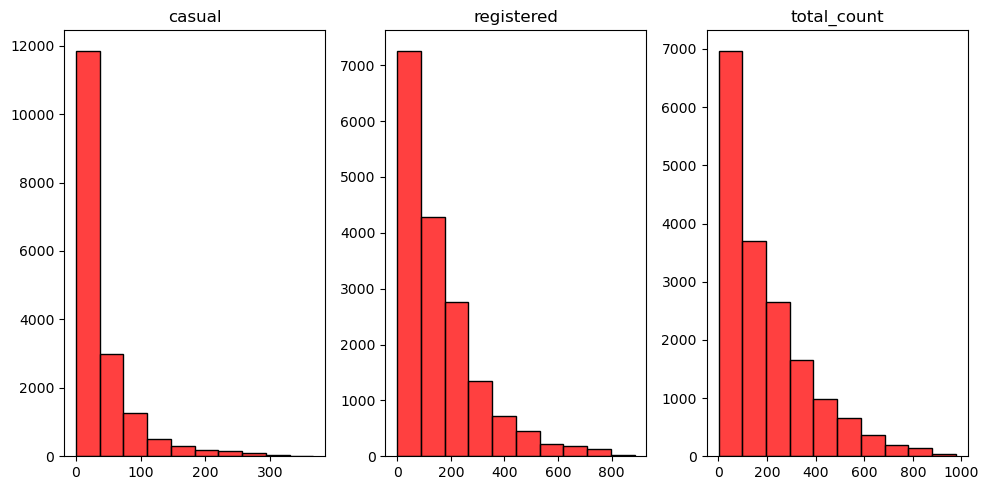

In [9]:
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=data[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

C:\Users\Rania\AppData\Local\Temp\ipykernel_12184\2889927384.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_count'], ax=ax1)


[Text(0.5, 1.0, 'Theoretical quantiles')]

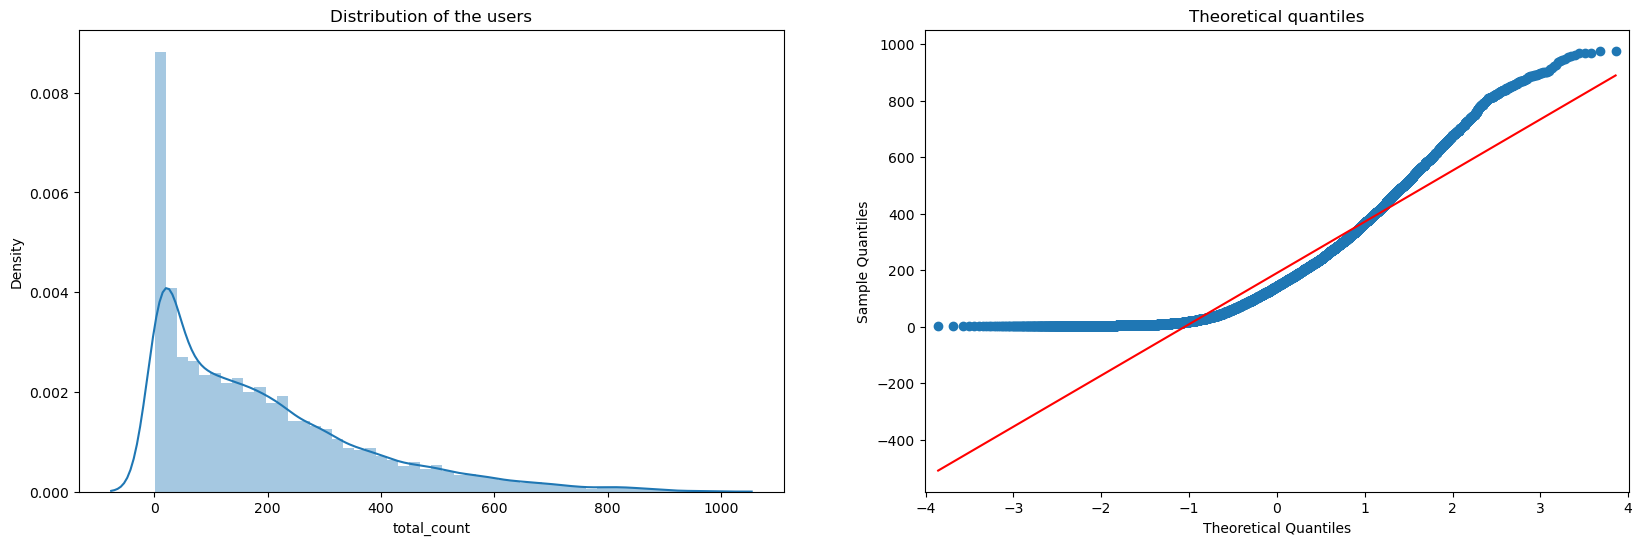

In [44]:
# vis distribution 
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(data['total_count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(data['total_count'], ax=ax2, line='s')
ax2.set(title='Theoretical quantiles')

- L'histogramme pour casual, registered et total montre une distribution asymétrique à droite.


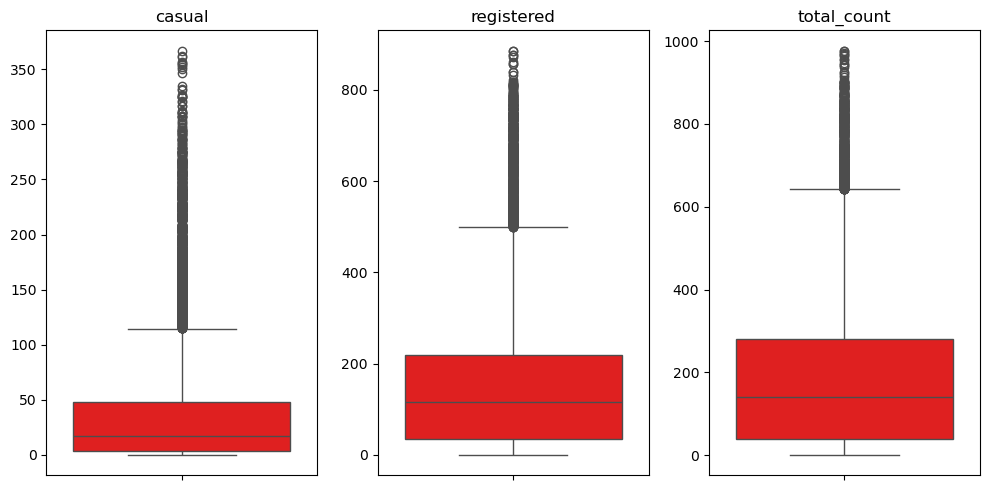

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.boxplot(y=data[columns[i]], ax=ax, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

- Toutes les boxplots montrent également la présence de valeurs aberrantes.

### Analyse Biivariee

- Plot the cnt vs dteday and examine its patterns and irregularities faut le faire pour daily.csv pour avoir un graph plus clean


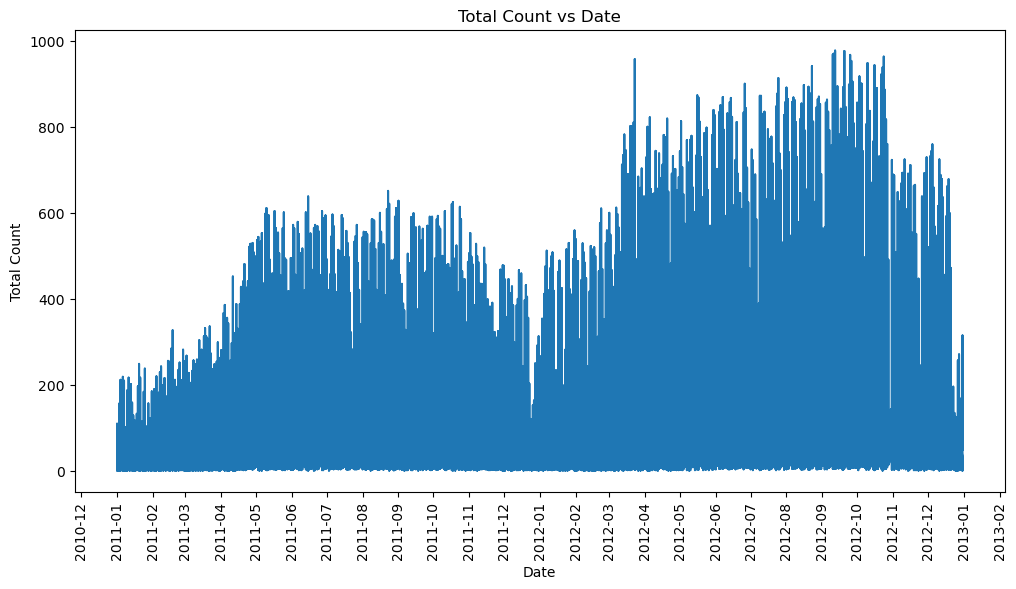

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('bike+sharing+dataset/hour.csv')

# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Plot the cnt vs dteday
plt.figure(figsize=(12,6))
plt.plot(df['dteday'], df['cnt'])
plt.title('Total Count vs Date')
plt.xlabel('Date')
plt.ylabel('Total Count')

# Adjust xticks to show one tick for each month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

plt.show()


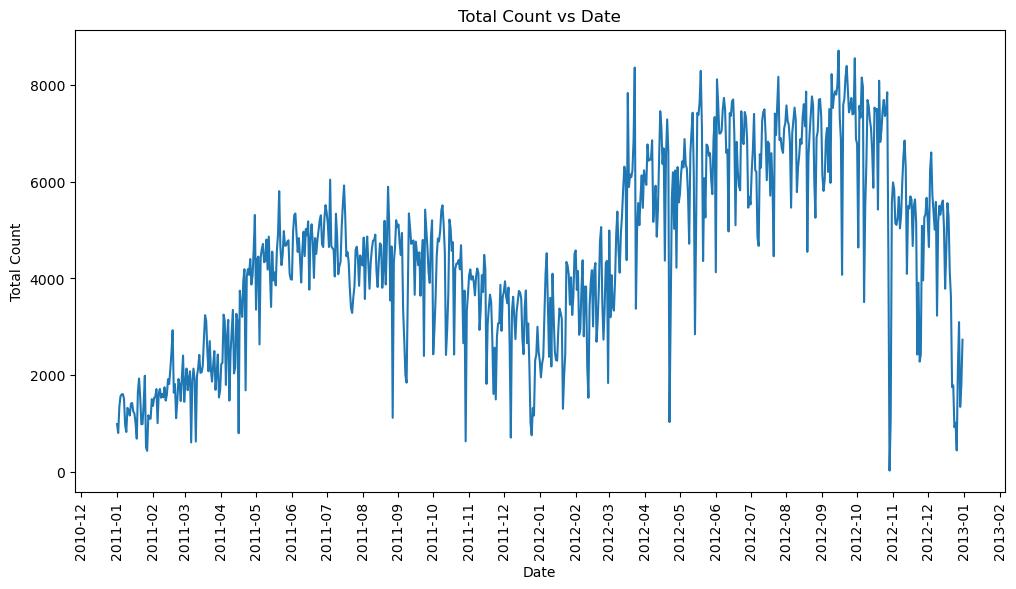

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('bike+sharing+dataset/day.csv')

# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Plot the cnt vs dteday
plt.figure(figsize=(12,6))
plt.plot(df['dteday'], df['cnt'])
plt.title('Total Count vs Date')
plt.xlabel('Date')
plt.ylabel('Total Count')

# Adjust xticks to show one tick for each month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

plt.show()


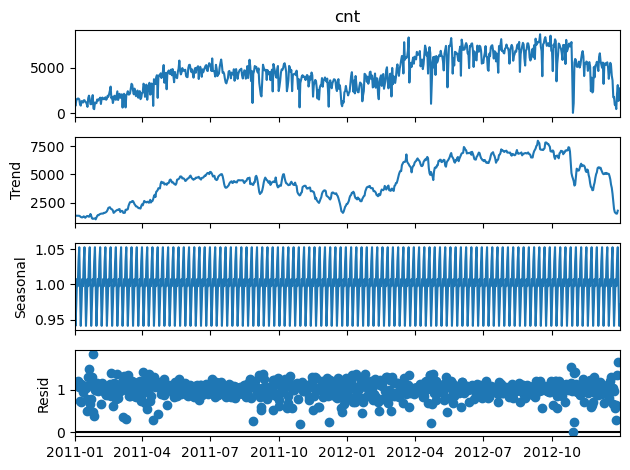

In [13]:
import statsmodels.api as sm


# Set 'dteday' as the index
df.set_index('dteday', inplace=True)

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['cnt'], model='multiplicative')

# Plot the decomposed time series
decomposition.plot()
plt.show()


[Text(0.5, 1.0, 'Relation between humidity and users')]

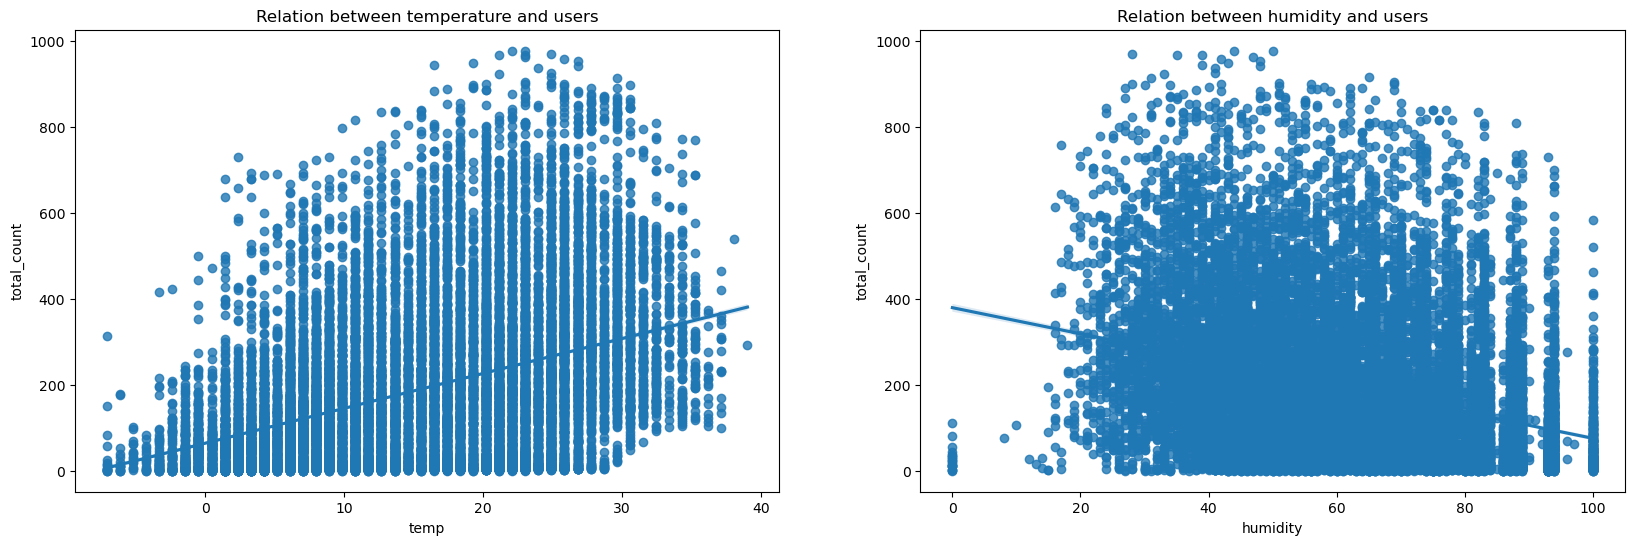

In [42]:
# visualisation pour voir leffet de la temperature et l'humidite sur les locations
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=data['temp'], y=data['total_count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=data['humidity'], y=data['total_count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

- Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?


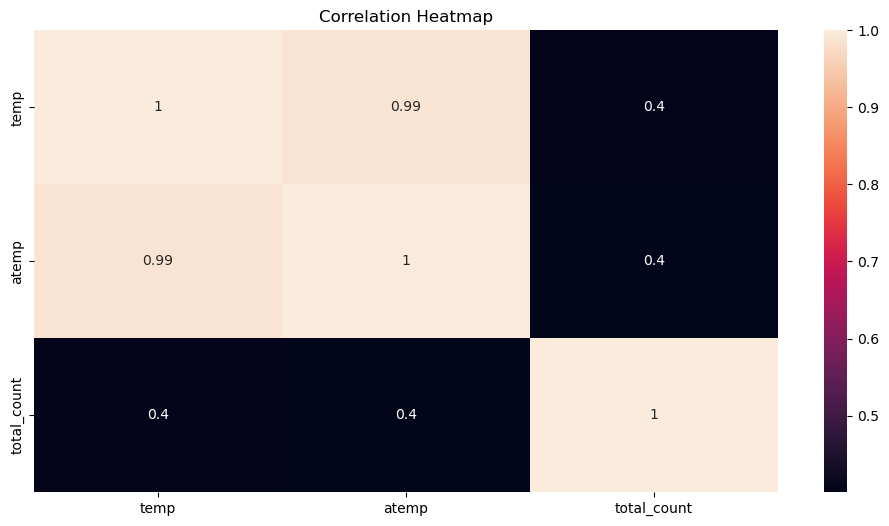

In [14]:
# Correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals
plt.figure(figsize=(12,6))
sns.heatmap(data[['temp', 'atemp', 'total_count']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

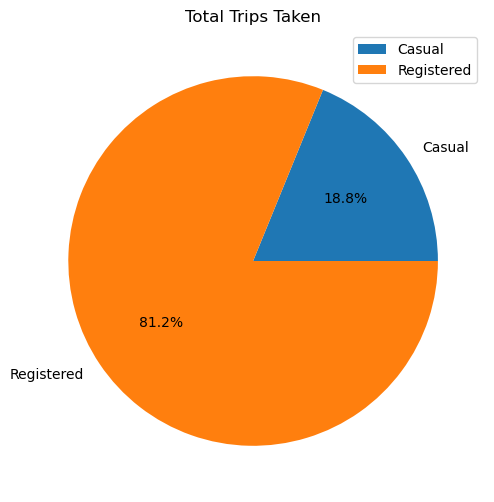

In [15]:
# Pie chart for Total Trips Taken (registered vs casual)
plt.figure(figsize=(6,6))
plt.pie(data[['casual', 'registered']].sum(), labels=['Casual', 'Registered'], autopct='%1.1f%%')
plt.title('Total Trips Taken')
plt.legend()
plt.show()

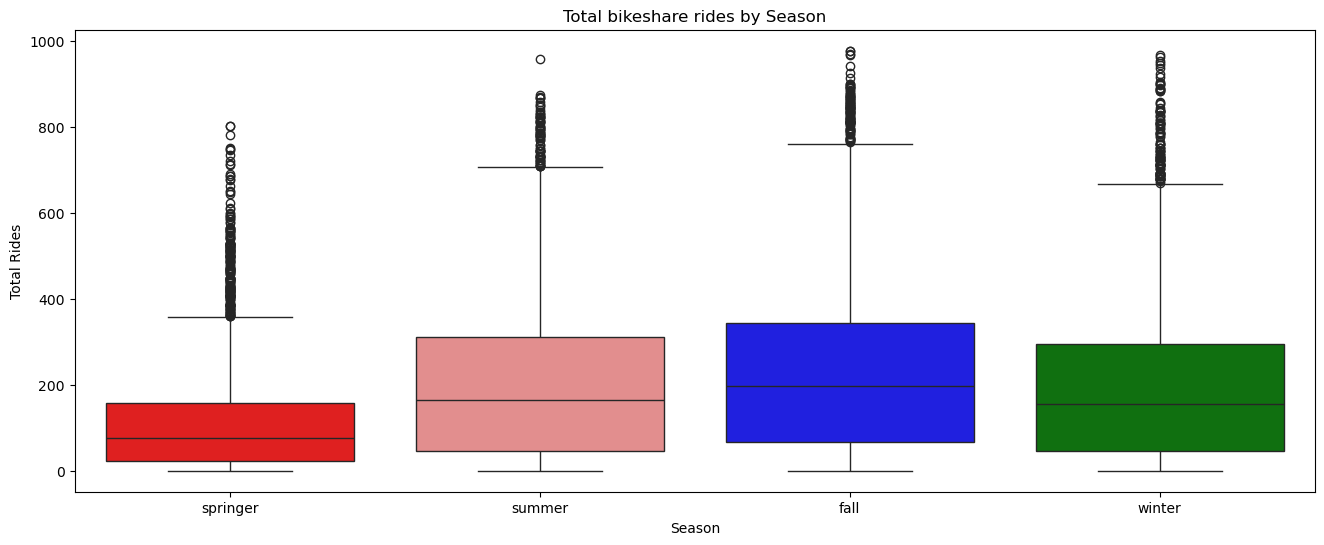

In [16]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="total_count",
    hue="season",  # Assign 'season' to hue
    data=data,
    palette=["red", "lightcoral", "blue", "green"],  # Add more colors to match the number of unique 'season' values
    legend=False  # Set legend to False
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")

# Show the plot
plt.show()


- Le partage de vélos est le plus demandé en moyenne à l’automne, suivit pr la saison estivale, ensuite l'hiver ensuite le printemps.

Text(0.5, 1.0, 'Total bikeshare rides by Month')

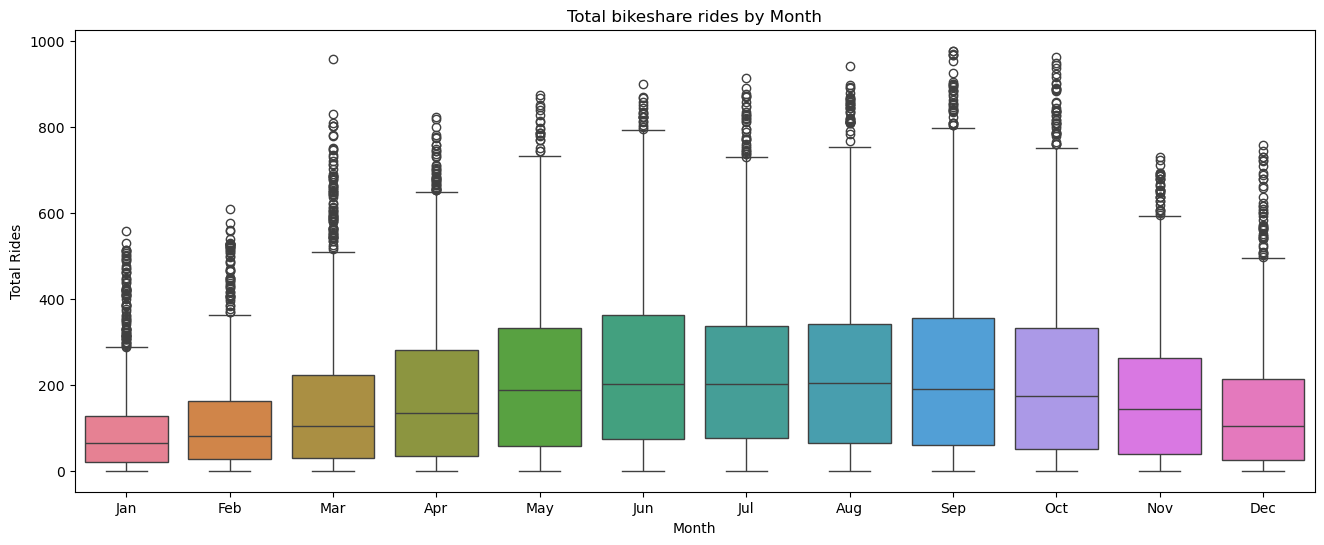

In [17]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="total_count",
    data=data,
    hue='month'
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Month")

Le partage de vélos est le plus demandé entre juin et apres juillet aout.

##### Au cours de quel mois le vélo reçoit-il le plus de commandes sur une période d'un an ?

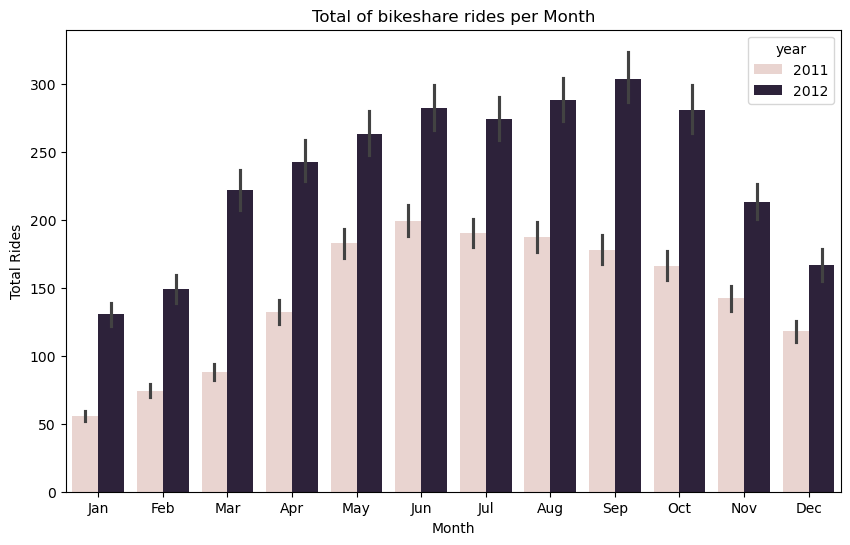

In [18]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=data, hue='year')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")

plt.show()

- La demande de vélos en libre-service a atteint son niveau le plus élevé en septembre 2012.
- La demande de vélos en libre-service a atteint son plus haut niveau en juin 2011.

##### À quelle saison le vélo reçoit-il le plus de commandes en 1 an ?

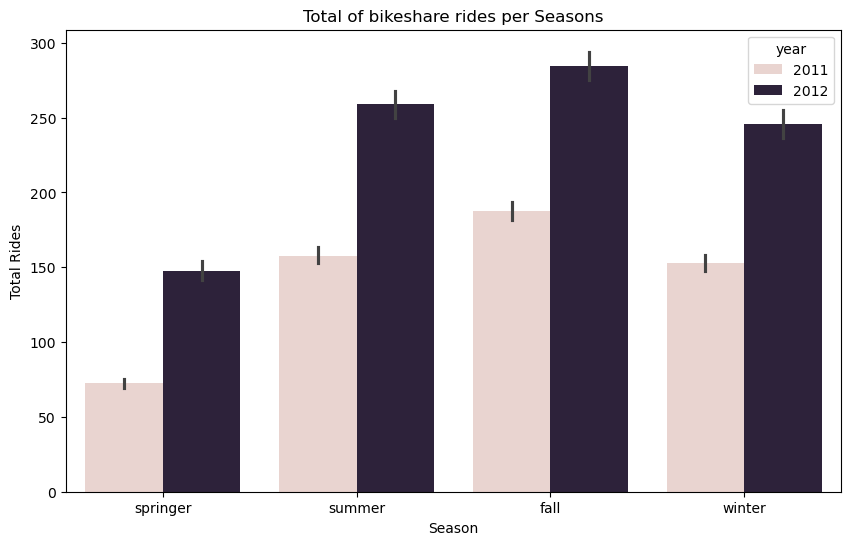

In [19]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=data, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")

plt.show()

- La demande de vélos en libre-service a été la plus forte à l'été 2011.
- La demande de vélos en libre-service a été la plus forte à l'été 2012.

In [20]:
data.temp

0        3.28
1        2.34
2        2.34
3        3.28
4        3.28
         ... 
17374    4.22
17375    4.22
17376    4.22
17377    4.22
17378    4.22
Name: temp, Length: 17379, dtype: float64

- Is temperature associated with bike rentals (registered vs. casual)?

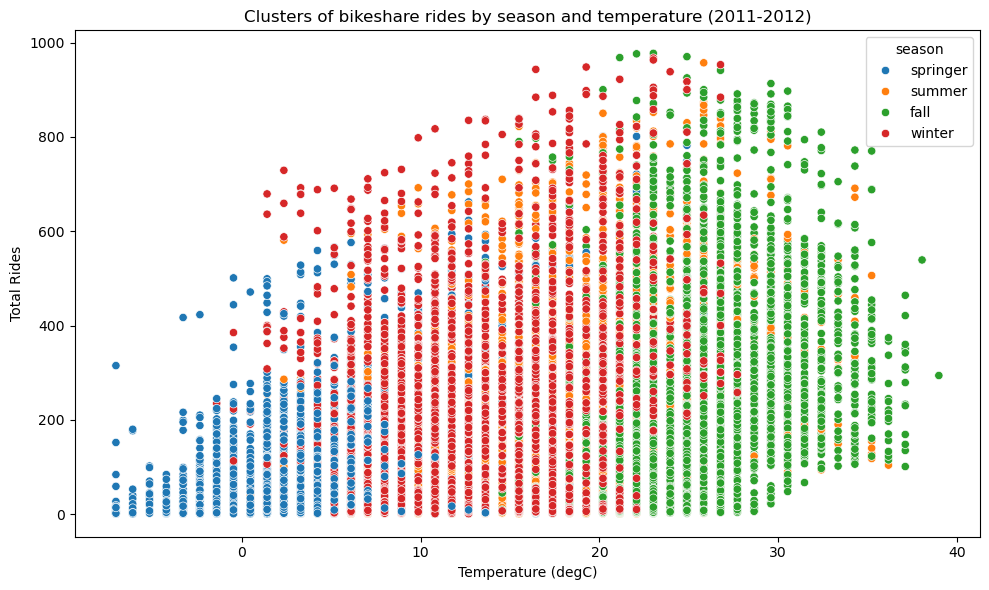

In [21]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count', data=data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

- Les commandes de vélos partagés ont une valeur minimale en hiver.
- À mesure que les températures augmentent, la demande de vélos en libre-service augmente, mais si elle augmente trop (en ete), la demande diminue. La demande de vélos en libre-service est la plus élevée en automne.
- La demande de vélos en libre-service est plus forte dans la plage de température de 20 à 30 degrés Celsius ou pendant les périodes d'été et d'automne.

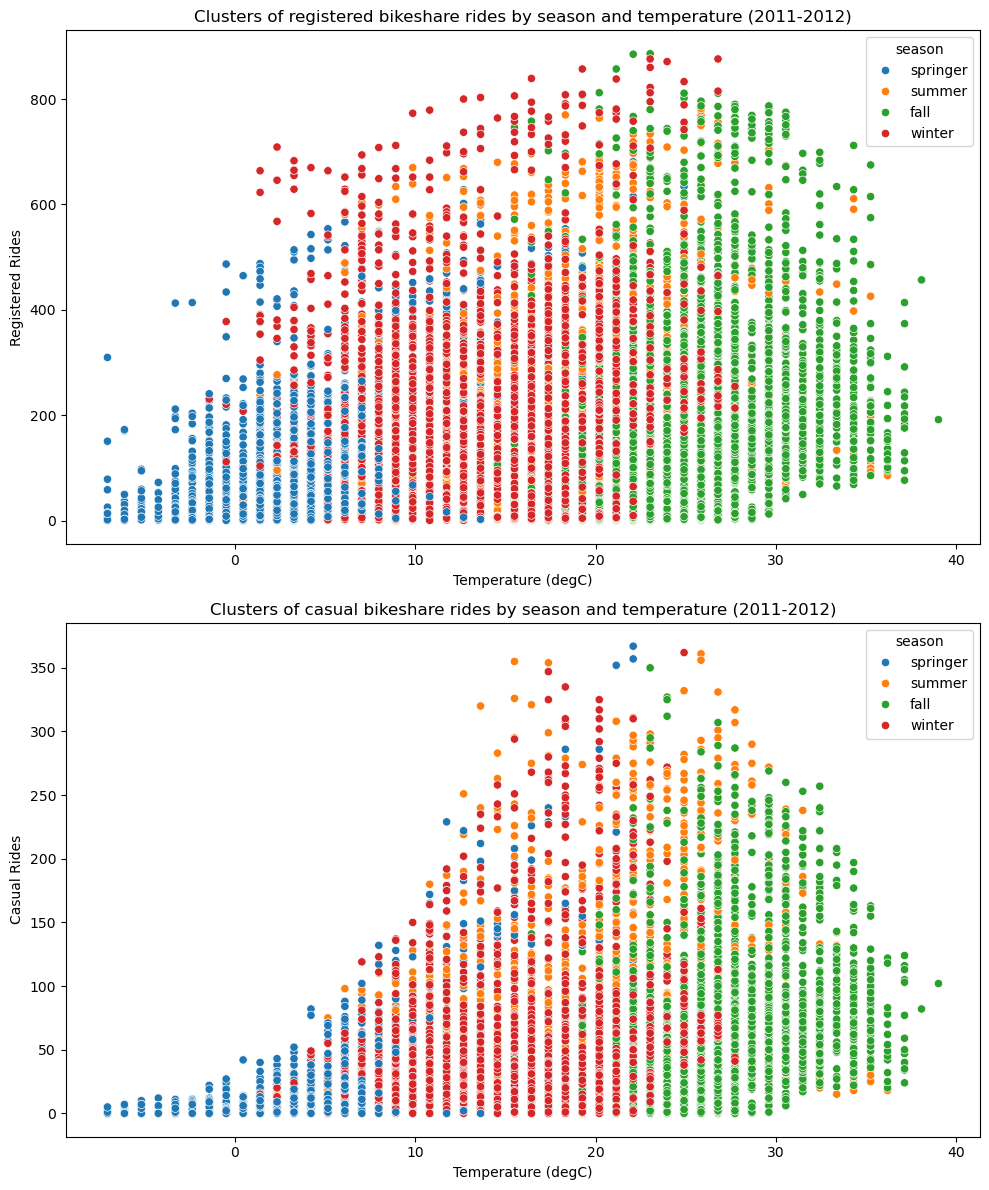

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10,12))

# Create a scatter plot for registered rentals
sns.scatterplot(x='temp', y='registered', data=data, hue='season', ax=axes[0])
axes[0].set_xlabel("Temperature (degC)")
axes[0].set_ylabel("Registered Rides")
axes[0].set_title("Clusters of registered bikeshare rides by season and temperature (2011-2012)")

# Create a scatter plot for casual rentals
sns.scatterplot(x='temp', y='casual', data=data, hue='season', ax=axes[1])
axes[1].set_xlabel("Temperature (degC)")
axes[1].set_ylabel("Casual Rides")
axes[1].set_title("Clusters of casual bikeshare rides by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()


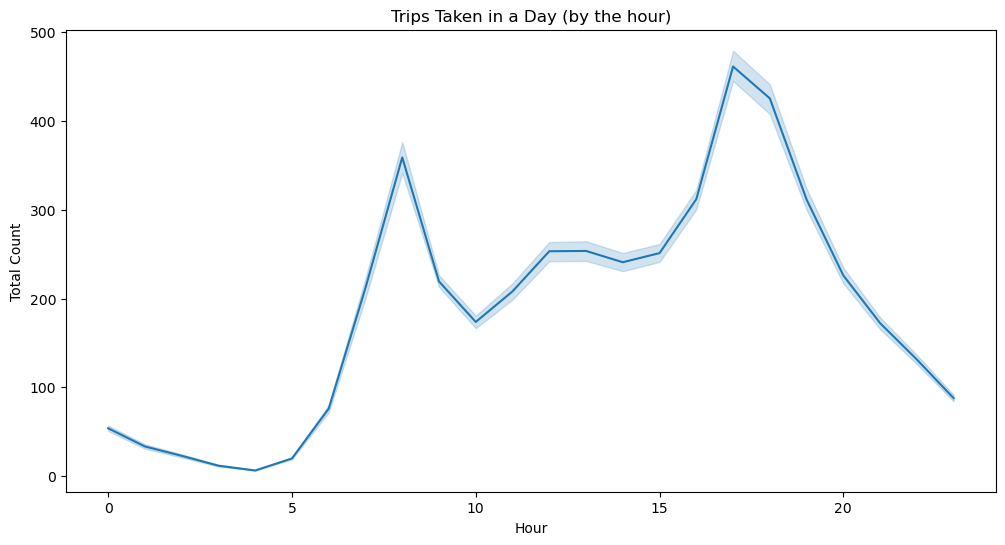

In [23]:
# Line graph for trips taken in a day (by the hour)
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='hour', y='total_count')
plt.title('Trips Taken in a Day (by the hour)')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.show()

C:\Users\Rania\AppData\Local\Temp\ipykernel_12184\1054725002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_count_per_hour = data.groupby('hour')['total_count'].mean()


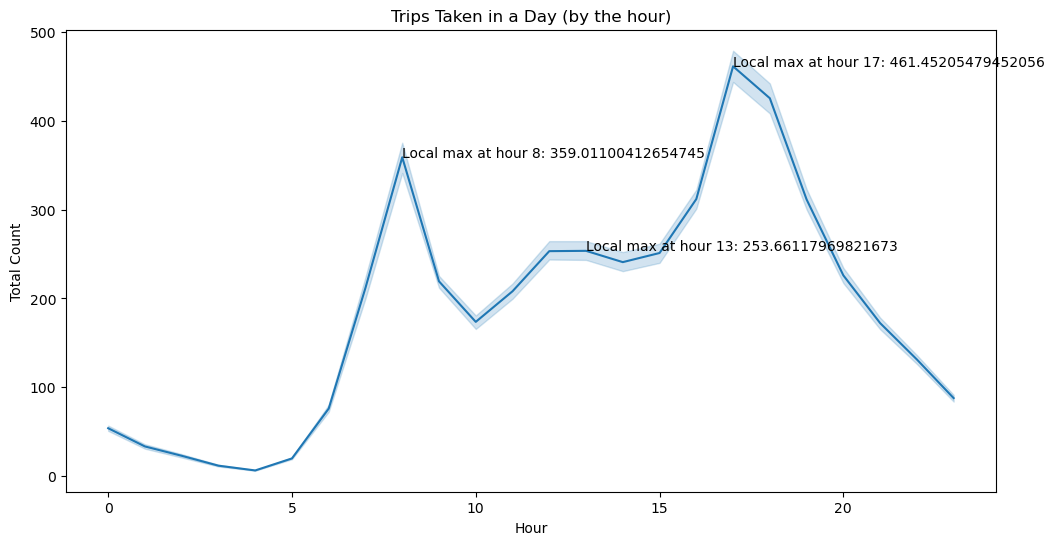

In [31]:
data.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count', 'mean_temp_atemp'],
      dtype='object')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

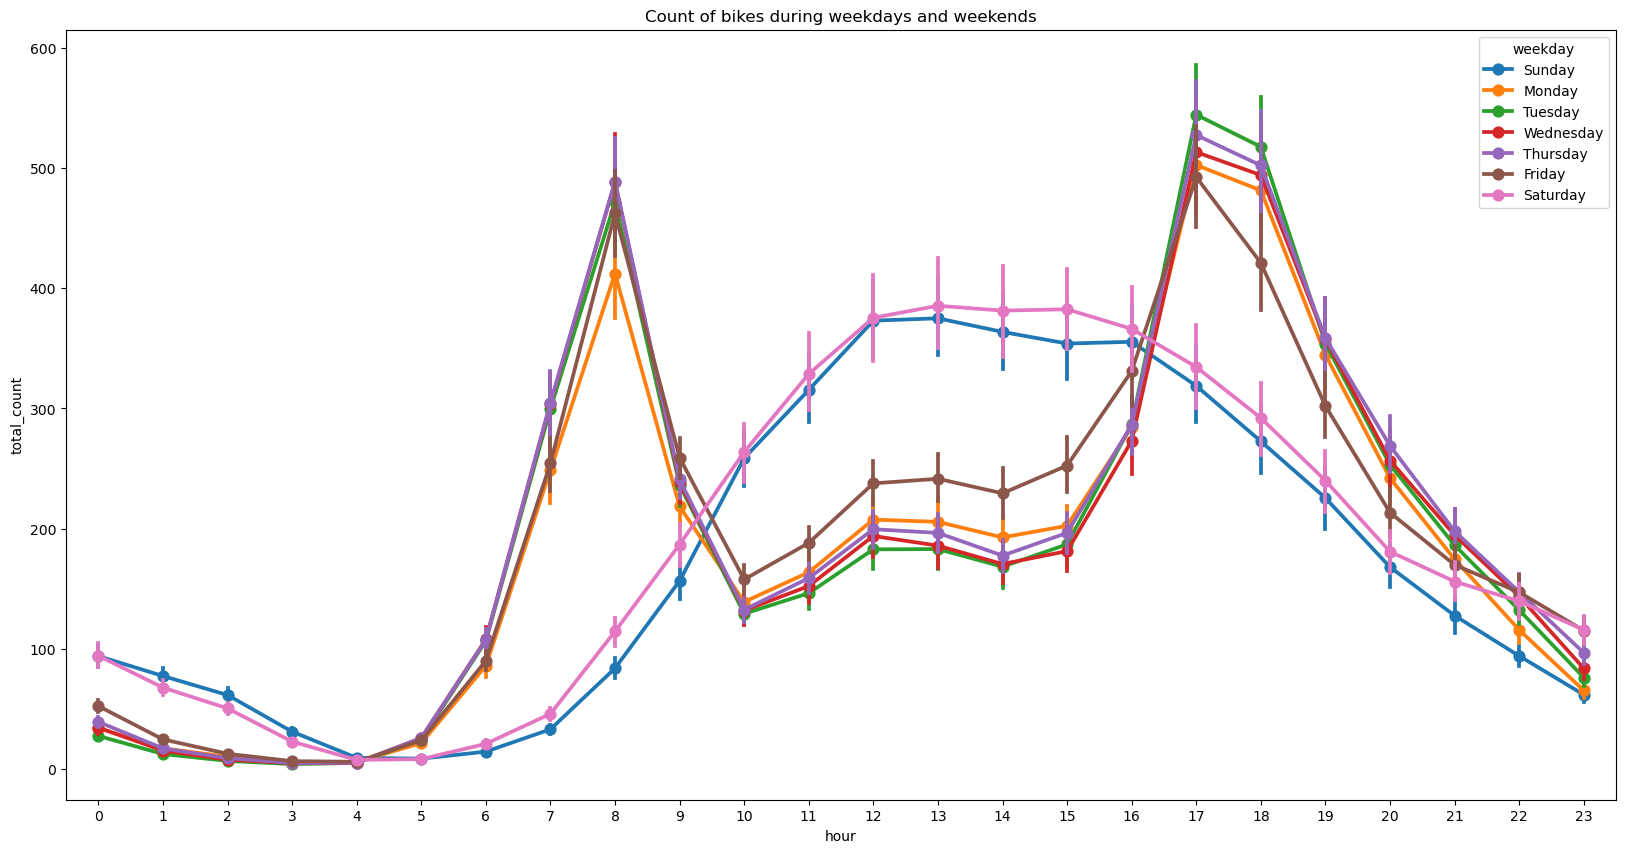

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='hour', y='total_count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

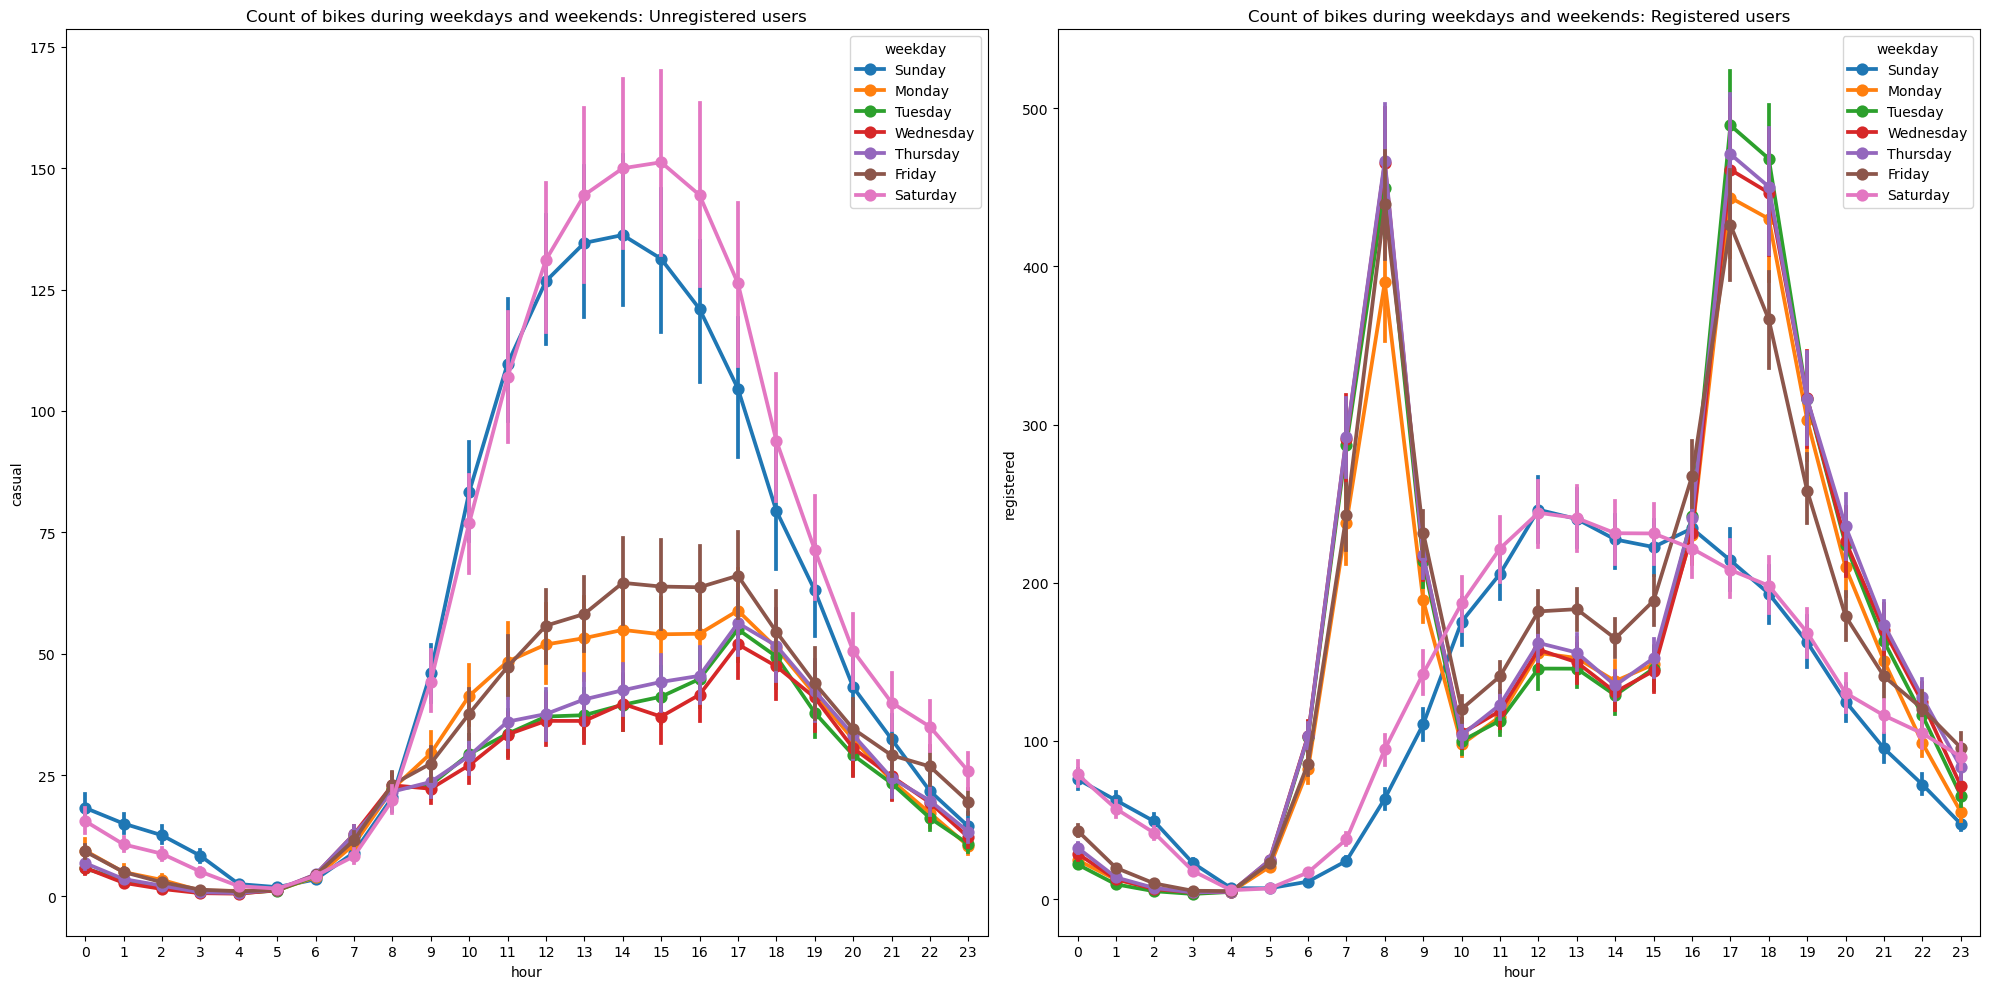

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))  # Create a figure with two subplots

# Plot for 'casual'
sns.pointplot(data=data, x='hour', y='casual', hue='weekday', ax=axs[0])  # Use the first subplot
axs[0].set(title='Count of bikes during weekdays and weekends: Unregistered users')

# Plot for 'registered'
sns.pointplot(data=data, x='hour', y='registered', hue='weekday', ax=axs[1])  # Use the second subplot
axs[1].set(title='Count of bikes during weekdays and weekends: Registered users')

plt.tight_layout()  # To prevent overlapping


[Text(0.5, 1.0, 'Count of bikes during different weathers')]

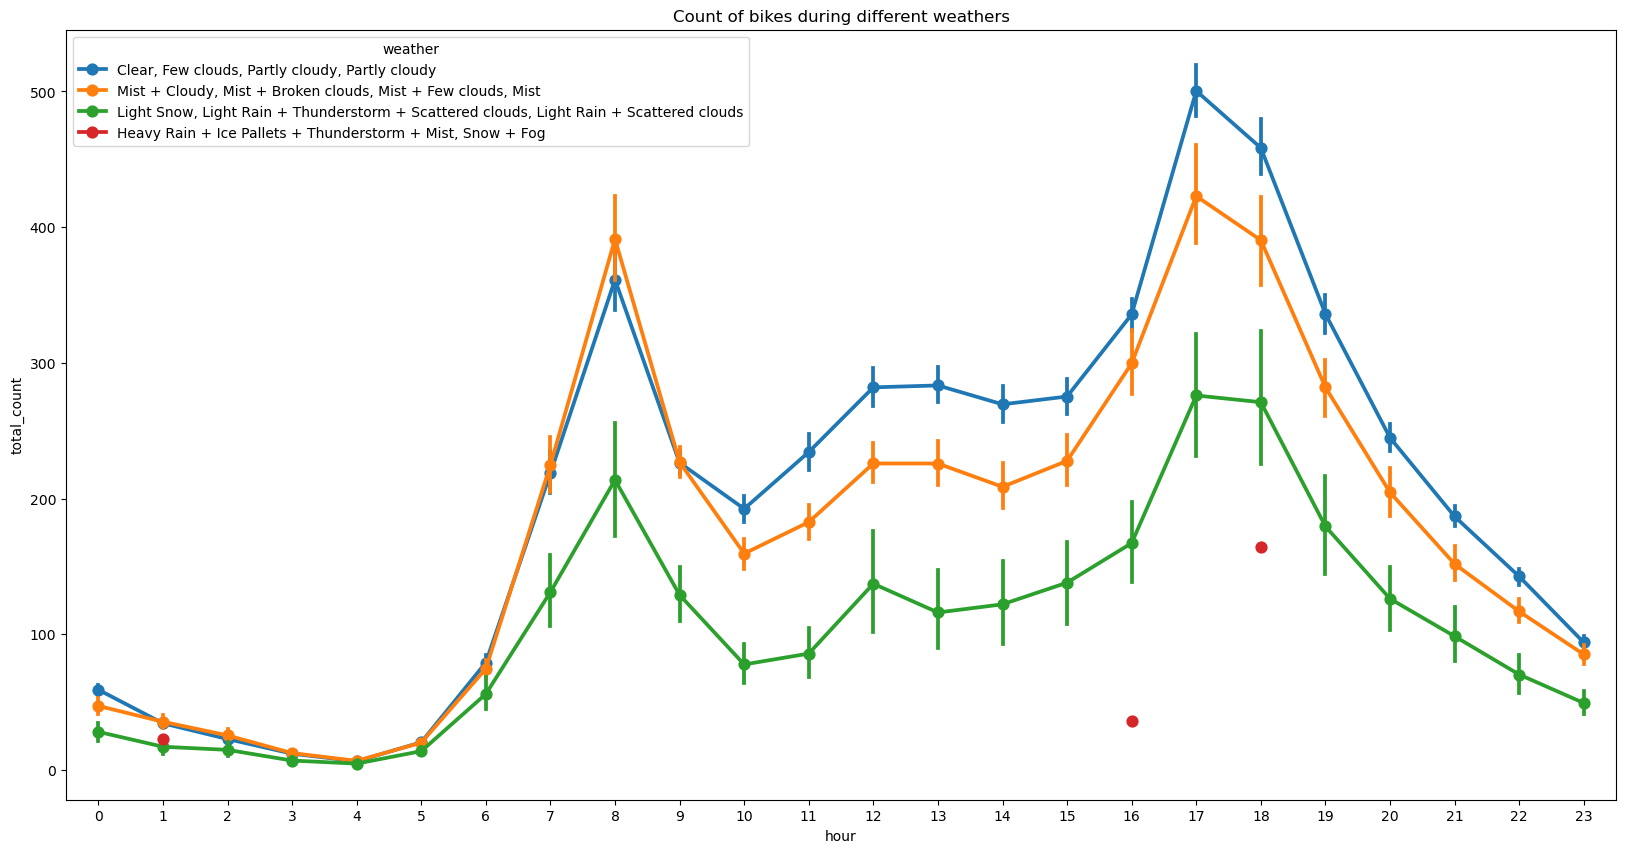

In [39]:
# On peut bien visualiser aussi les pics selon la meteo
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='hour', y='total_count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

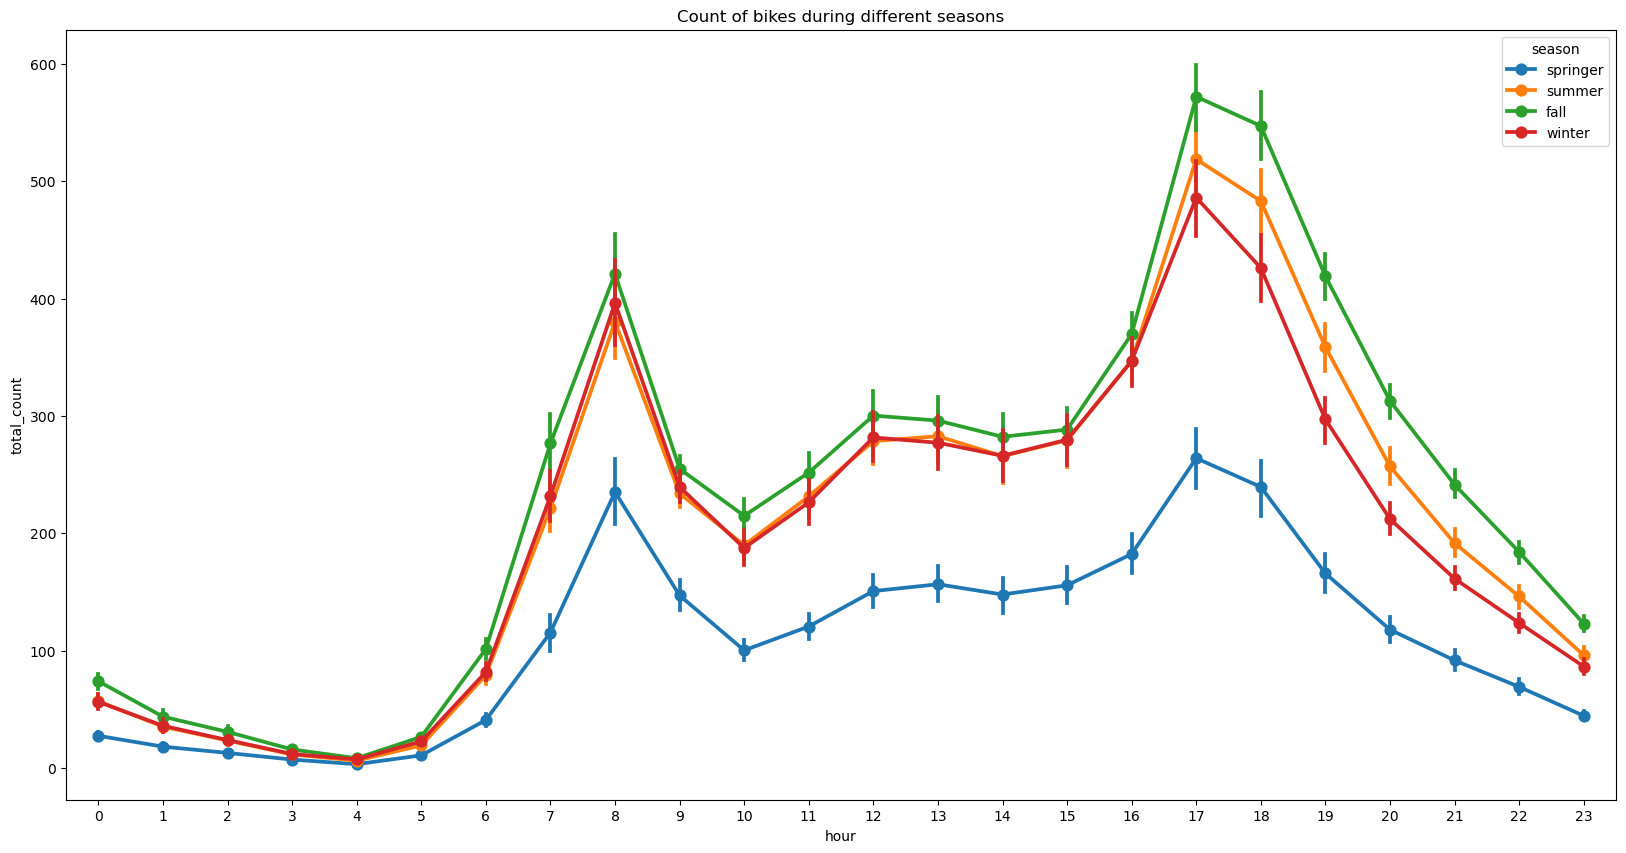

In [38]:
#selon la saison aussi
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='hour', y='total_count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

### Analyse Multivariee

- Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?


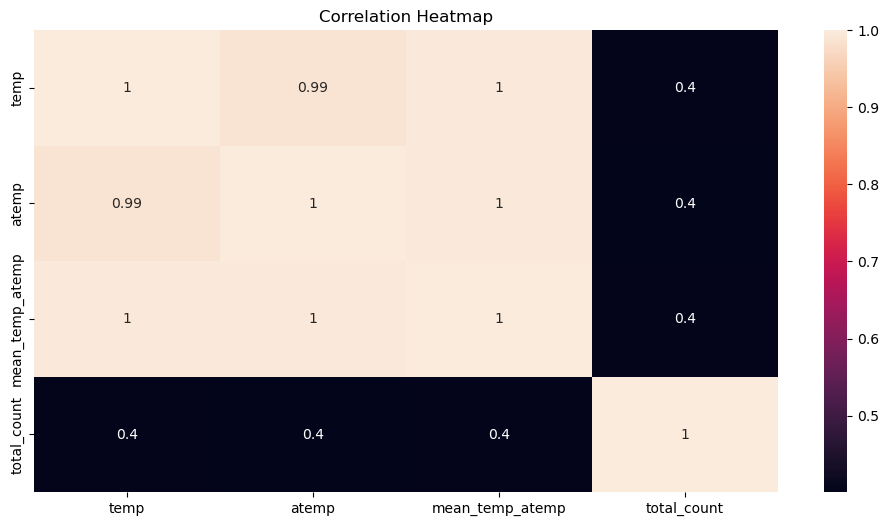

In [26]:
data['mean_temp_atemp'] = (data['temp'] + data['atemp']) / 2
plt.figure(figsize=(12,6))
sns.heatmap(data[['temp', 'atemp', 'mean_temp_atemp', 'total_count']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


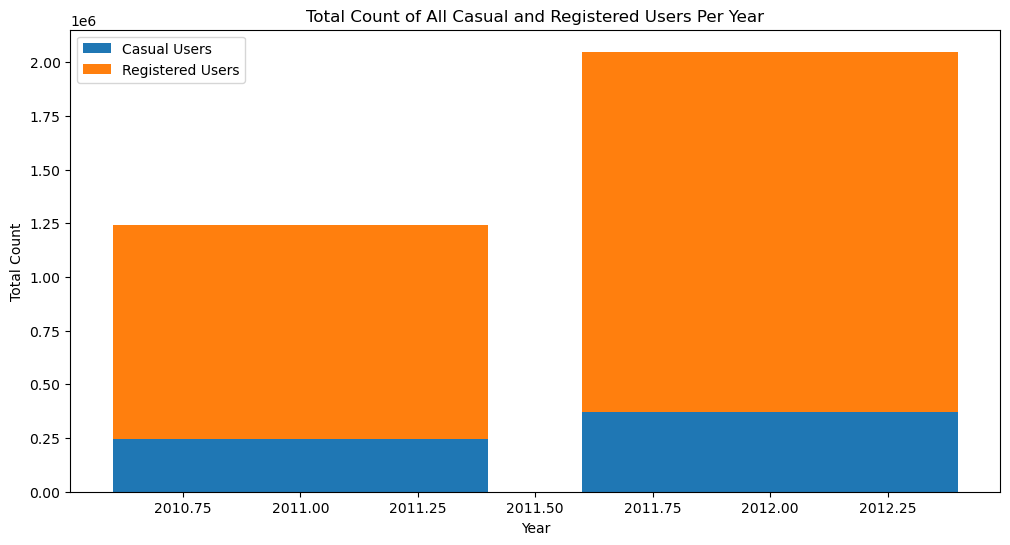

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by year and calculate the total count for casual and registered users
grouped_data = data.groupby('year')[['casual', 'registered']].sum()

# Plot the total count of all casual and registered users per year
plt.figure(figsize=(12,6))
plt.bar(grouped_data.index, grouped_data['casual'], label='Casual Users')
plt.bar(grouped_data.index, grouped_data['registered'], bottom=grouped_data['casual'], label='Registered Users')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total Count of All Casual and Registered Users Per Year')
plt.legend()
plt.show()


In [28]:
grouped_data = data.groupby('year')

What are the mean temperature, humidity, windspeed and total rentals per months?

In [29]:
# Group the data by month and calculate the mean
mean_values = data.groupby('month')[['temp', 'humidity', 'windspeed', 'total_count']].mean()

# Print the mean values
print(mean_values)


            temp   humidity  windspeed  total_count
month                                              
Jan     3.169489  58.093072  13.905913    94.424773
Feb     6.109814  56.721104  14.469407   112.865026
Mar    10.372437  58.904956  14.908628   155.410726
Apr    14.090981  58.811413  15.699657   187.260960
May    19.955524  68.895833  12.260253   222.907258
Jun    24.152569  57.580556  12.423135   240.515278
Jul    27.507110  59.787634  11.125944   231.819892
Aug    25.309139  63.722712  11.488388   238.097627
Sep    20.975811  71.445372  11.112367   240.773138
Oct    14.897519  68.949001  11.518584   222.158511
Nov     9.352387  62.504523  12.312176   177.335421
Dec     7.235860  66.611598  11.830479   142.303439


C:\Users\Rania\AppData\Local\Temp\ipykernel_12184\1913000666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data.groupby('month')[['temp', 'humidity', 'windspeed', 'total_count']].mean()
